In [33]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, END
import random

In [34]:
class LoopGraph(TypedDict):
    player_name: str
    targetnum: int
    guesses: int
    attempt: int
    lower_bound: int
    upper_bound: int

In [35]:
def setUp_loop(state: LoopGraph) -> LoopGraph:
    """Initializes the loop graph with the given state."""
    state['player_name'] = f"Hello, {state['player_name']}!, welcome to the guessing game."
    state['targetnum'] = random.randint(1,20)
    state['guesses'] = []
    state['attempt'] = 0
    return state

def guess_loop(state: LoopGraph) -> LoopGraph:
    """Processes a guess and updates the state accordingly."""
    state['guesses'].append(random.randint(state['lower_bound'], state['upper_bound']))
    state['attempt'] += 1
    return state

def decider_loop(state: LoopGraph) -> LoopGraph:
    """Decides whether the game should continue or end based on the current state."""
    if state['attempt'] >= 7:
        return END
    elif state['attempt'] < 7:
        print(f"Attempt {state['attempt']}: Guess is {state['guesses'][-1]}")
        return 'guess_loop'

def hint_loop(state: LoopGraph) -> LoopGraph:
    """Provides a hint based on the current guess."""
    last_guess = state['guesses'][-1]
    target = state['targetnum']

    if last_guess < target:
        print("Your guess is too low.")
    elif last_guess > target:
        print("Your guess is too high.")
    else:
        print("Congratulations! You've guessed the number!")
        return END
    return 'decider_loop'



In [36]:
graph = StateGraph(LoopGraph)

graph.add_node('setUp', setUp_loop)
graph.add_node('guess', guess_loop)
graph.add_node('hint', hint_loop)
graph.add_edge('setUp', 'guess')
graph.add_edge('guess', 'hint')

graph.set_entry_point('setUp')
graph.add_conditional_edges("hint", decider_loop, { "continue" : 'guess'})




app = graph.compile()

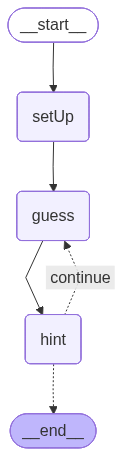

In [37]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
answer = app.invoke({'player_name': 'student', 'guesses': [], 'attempt': 0, 'lower_bound': 1, 'upper_bound': 20})
print(answer)


Your guess is too high.


InvalidUpdateError: Expected dict, got decider_loop
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_GRAPH_NODE_RETURN_VALUE